<a href="https://colab.research.google.com/github/mustaqimkhan317/TitanicSurvivalPrediction/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports 

# pandas
import pandas as pd

# plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

##Data Visualization 

>The goal is to identify patterns among the data

In [2]:
train_data = pd.read_csv('/content/Titanic_dataset/train.csv')
test_data = pd.read_csv('/content/Titanic_dataset/test.csv')

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


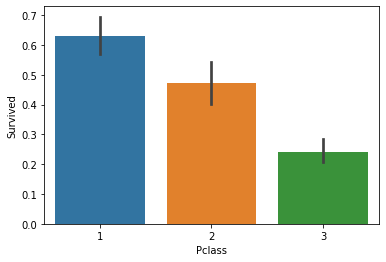

In [5]:
sns.barplot(x = train_data['Pclass'] , y = train_data['Survived'])

In [6]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


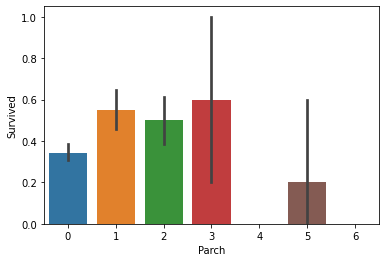

In [7]:
sns.barplot(x = train_data['Parch'], y = train_data['Survived'])

In [8]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


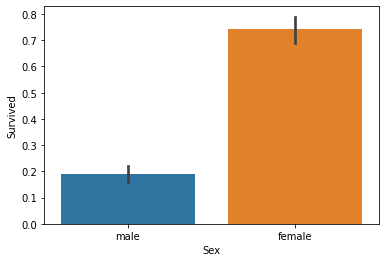

In [9]:
sns.barplot(x = train_data['Sex'], y = train_data['Survived'])

In [10]:
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


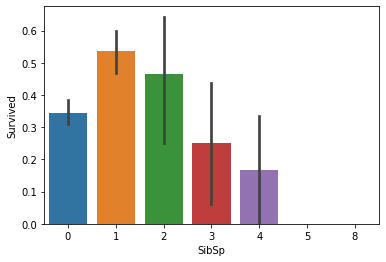

In [11]:
sns.barplot(x = train_data['SibSp'], y = train_data['Survived'])

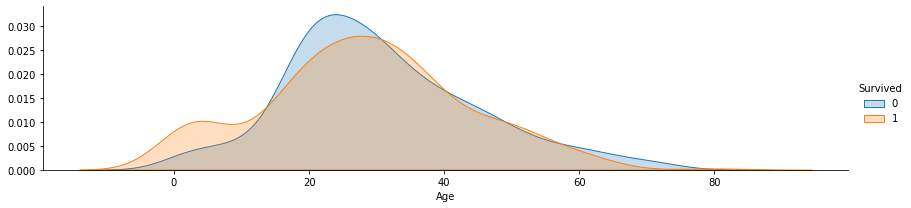

In [12]:
facet = sns.FacetGrid(data = train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.add_legend()

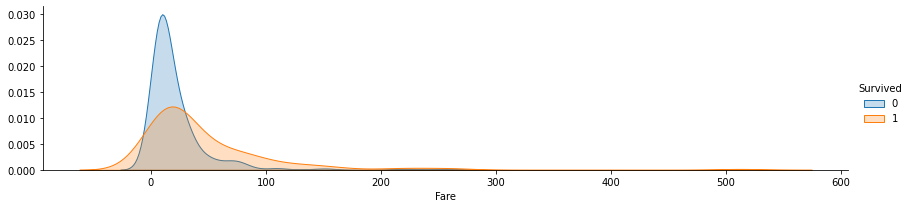

In [13]:
facet = sns.FacetGrid(data = train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.add_legend()

##Data Cleaning 

>From here we will extract meaningful features from our dataset

In [14]:
train_data = train_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin' ,'Name'], axis=1)
combine = [train_data, test_data]

In [15]:
for data in combine:
  data['Sex'] = data['Sex'].map({'female' : 1 , 'male' : 0}).astype(int)

#train_data['Sex'] = train_data['Sex'].map({'female' : 1 , 'male' : 0}).astype(int)
train_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,0,27.0,0,0,13.00,S
887,888,1,1,1,19.0,0,0,30.00,S
888,889,0,3,1,NaN,1,2,23.45,S
889,890,1,1,0,26.0,0,0,30.00,C
890,891,0,3,0,32.0,0,0,7.75,Q


In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [17]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 6)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [18]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 27), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 54), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 54) & (dataset['Age'] <= 67), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 67) & (dataset['Age'] <= 80), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_data.head()    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,0,1.0,1,0,7.2500,S,"(13.683, 26.947]"
1,2,1,1,1,2.0,1,0,71.2833,C,"(26.947, 40.21]"
2,3,1,3,1,1.0,0,0,7.9250,S,"(13.683, 26.947]"
3,4,1,1,1,2.0,1,0,53.1000,S,"(26.947, 40.21]"
4,5,0,3,0,2.0,0,0,8.0500,S,"(26.947, 40.21]"


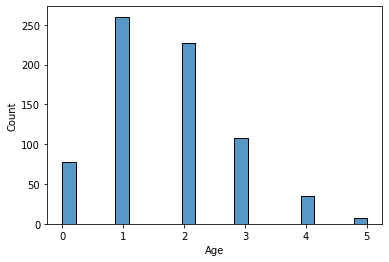

In [19]:
sns.histplot(data=train_data, x=train_data['Age'])

In [20]:
train_data = train_data.drop(['AgeBand'], axis=1)
train_data['Age'] = train_data['Age'].fillna(0.0).astype(int)
test_data['Age'] = test_data['Age'].fillna(0.0).astype(int)
combine = [train_data, test_data]
    
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,7.2500,S
1,2,1,1,1,2,1,0,71.2833,C
2,3,1,3,1,1,0,0,7.9250,S
3,4,1,1,1,2,1,0,53.1000,S
4,5,0,3,0,2,0,0,8.0500,S


In [21]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,7.8292,Q
1,893,3,1,3,1,0,7.0000,S
2,894,2,0,4,0,0,9.6875,Q
3,895,3,0,1,0,0,8.6625,S
4,896,3,1,1,1,1,12.2875,S


In [22]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [23]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].fillna(0.0).astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,S
1,2,1,1,1,2,1,0,3,C
2,3,1,3,1,1,0,0,1,S
3,4,1,1,1,2,1,0,3,S
4,5,0,3,0,2,0,0,1,S
5,6,0,3,0,0,0,0,1,Q
6,7,0,1,0,3,0,0,3,S
7,8,0,3,0,0,3,1,2,S
8,9,1,3,1,1,0,2,1,S
9,10,1,2,1,0,1,0,2,C


In [24]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,0,Q
1,893,3,1,3,1,0,0,S
2,894,2,0,4,0,0,1,Q
3,895,3,0,1,0,0,1,S
4,896,3,1,1,1,1,1,S


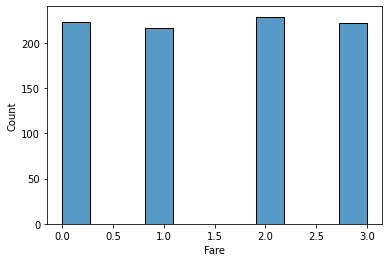

In [25]:
sns.histplot(data=train_data, x=train_data['Fare'])

In [26]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,0,Q
1,893,3,1,3,1,0,0,S
2,894,2,0,4,0,0,1,Q
3,895,3,0,1,0,0,1,S
4,896,3,1,1,1,1,1,S


In [27]:
train_data[['Embarked' , 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


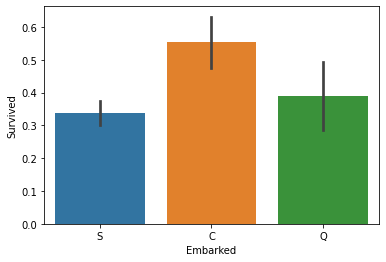

In [28]:
sns.barplot(x = train_data['Embarked'] , y = train_data['Survived'])

In [29]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).fillna(0.0).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,2,1,0,3,1
2,3,1,3,1,1,0,0,1,0
3,4,1,1,1,2,1,0,3,0
4,5,0,3,0,2,0,0,1,0


In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


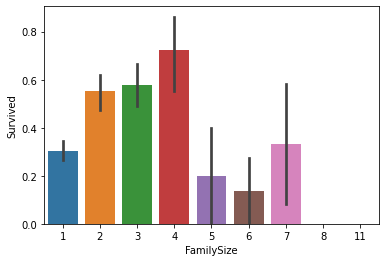

In [31]:
sns.barplot(x = train_data['FamilySize'] , y = train_data['Survived'])

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


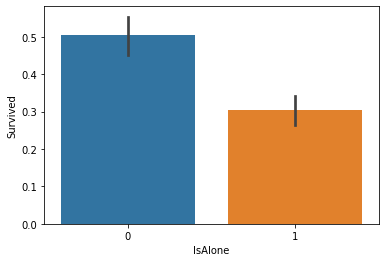

In [33]:
sns.barplot(x = train_data['IsAlone'] , y = train_data['Survived'])

In [34]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,892,3,0,2,0,0,0,2,1,1
1,893,3,1,3,1,0,0,0,2,0
2,894,2,0,4,0,0,1,2,1,1
3,895,3,0,1,0,0,1,0,1,1
4,896,3,1,1,1,1,1,0,3,0


In [35]:
train_data = train_data.drop(['SibSp' , 'Parch' , 'FamilySize'], axis=1)
test_data = test_data.drop(['SibSp' , 'Parch' , 'FamilySize'], axis=1)

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,0,1,0,0,0
1,2,1,1,1,2,3,1,0
2,3,1,3,1,1,1,0,1
3,4,1,1,1,2,3,0,0
4,5,0,3,0,2,1,0,1


In [37]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,0,2,1
1,893,3,1,3,0,0,0
2,894,2,0,4,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0


##Machine Learning 
>Logistic Regression

>KNN or k-Nearest Neighbors

>Support Vector Machines

>Decision Tree

>Random Forrest

>Perceptron


In [38]:
# defining and training dataset

X_train = train_data.drop(['Survived','PassengerId'] , axis=1)
Y_train = train_data['Survived']
X_test  = test_data.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [39]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,1,0,0,0
1,1,1,2,3,1,0
2,3,1,1,1,0,1
3,1,1,2,3,0,0
4,3,0,2,1,0,1


In [40]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg_acc = round(logreg.score(X_train, Y_train) * 100 , 2)

logreg_acc

78.79

In [41]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

acc_svc

81.48

In [42]:
# K - nearest neighbors

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

85.07

In [43]:
# Perceptron

perceptron = Perceptron()

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

acc_perceptron

76.99

In [44]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

87.09

In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

87.09

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, logreg_acc, 
              acc_random_forest, acc_perceptron, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.09
5,Decision Tree,87.09
1,KNN,85.07
0,Support Vector Machines,81.48
2,Logistic Regression,78.79
4,Perceptron,76.99


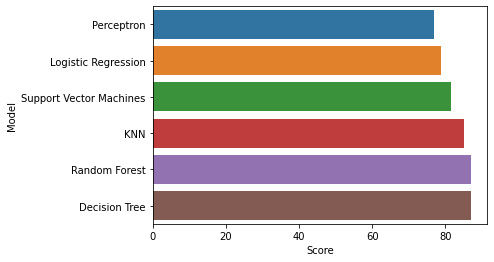

In [60]:
sns.barplot(x = models['Score'] , y = models['Model'], order=models.sort_values('Score').Model)

In [65]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.484049
4,Fare,0.239127
3,Age,-0.015220
5,Embarked,-0.126349
2,Sex,-0.231150
0,Survived,-1.087895
6,IsAlone,NaN
